[Data in Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv)

In [6]:
from zipfile import ZipFile

with ZipFile('/content/archive.zip', 'r') as zip_file:
    zip_file.extractall('/content/files')

# Import the libraries

In [7]:
import pandas as pd
import numpy as np

# Read the data

In [218]:
df1 = pd.read_csv("/content/files/athlete_events.csv")
df2 = pd.read_csv("/content/files/noc_regions.csv")

In [15]:
df1

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [13]:
df2.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


### Don't forget to drop duplicates first

In [219]:
df1.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)

# <font color='red'>**Beginner level**</font>

### Find the missing data in each column

In [18]:
df1.isna().sum()

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
dtype: int64

### Number of males and females

In [28]:
df1["Sex"].value_counts()

M    195353
F     74378
Name: Sex, dtype: int64

### How many cities do we have and what are they ?

In [35]:
df1["City"].value_counts()

London                    22297
Athina                    15556
Sydney                    13821
Atlanta                   13780
Rio de Janeiro            13688
Beijing                   13602
Barcelona                 12977
Seoul                     12037
Los Angeles               11919
Munich                    10304
Montreal                   8641
Mexico City                8588
Helsinki                   8270
Roma                       8119
Tokyo                      7702
Moskva                     7191
Paris                      7008
Berlin                     6251
Sochi                      4891
Melbourne                  4829
Amsterdam                  4656
Vancouver                  4402
Torino                     4382
Stockholm                  4338
Antwerpen                  4292
Salt Lake City             4109
Innsbruck                  3639
Nagano                     3605
Albertville                3436
Lillehammer                3160
Calgary                    2639
Sarajevo

# <font color='red'>**Intermediate level**</fond>

### Find the number of athlete for each year

In [40]:
df1

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [43]:
df1.groupby(["Year"]).count()["Name"]

Year
1896      380
1900     1898
1904     1301
1906     1733
1908     3069
1912     4040
1920     4292
1924     5570
1928     5238
1932     2817
1936     7146
1948     7383
1952     9358
1956     6434
1960     9235
1964     9480
1968    10479
1972    11959
1976    10502
1980     8937
1984    11588
1988    14676
1992    16413
1994     3160
1996    13780
1998     3605
2000    13821
2002     4109
2004    13443
2006     4382
2008    13602
2010     4402
2012    12920
2014     4891
2016    13688
Name: Name, dtype: int64

### Which athlete participated the most? (his/her name and ID)

In [169]:
df1.groupby(["Name"]).count()["Year"].idxmax()#to find the name of the most participated athelte
Name_most_participated = df1["Name"]=="Heikki Ilmari Savolainen"
df1[['ID', 'Name']].loc[Name_most_participated]

,ID,Name
211674,106296,Heikki Ilmari Savolainen
211675,106296,Heikki Ilmari Savolainen
211676,106296,Heikki Ilmari Savolainen
211679,106296,Heikki Ilmari Savolainen
211680,106296,Heikki Ilmari Savolainen
211684,106296,Heikki Ilmari Savolainen
211692,106296,Heikki Ilmari Savolainen
211698,106296,Heikki Ilmari Savolainen
211700,106296,Heikki Ilmari Savolainen


# <font color='red'>**Advanced level**</fond>

### Find the number of each medal for each year.
##### The output should look like this 
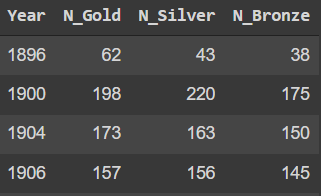

In [238]:
df1

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,empty
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,empty
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,empty
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,empty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,empty
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",empty
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",empty
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,empty


In [242]:
df1["Medal"].unique()

array(['empty', 'Gold', 'Bronze', 'Silver'], dtype=object)

In [278]:
year_grp = df1.groupby(['Year'])

year_grp["Medal"].agg([])
Gold_grp = year_grp["Medal"].value_counts()[:, "Gold"]
Silver_grp =  year_grp["Medal"].value_counts()[:, "Silver"]
Bronze_grp =  year_grp["Medal"].value_counts()[:, "Bronze"]

Gold_grp.name = "N_Gold"
Silver_grp.name = "N_Silver"
Bronze_grp.name = "N_Bronze"

new_grp = pd.concat([Gold_grp, Silver_grp, Bronze_grp], axis="columns", sort=False)
new_grp.head(20)

,N_Gold,N_Silver,N_Bronze
Year,,,
1896,62,43,38
1900,198,220,175
1904,173,163,150
1906,157,156,145
1908,294,281,256
1912,326,315,300
1920,493,448,367
1924,332,319,311
1928,275,267,281


# <font color='red'>**You are Geek!**</fond>

### What is the number of winners with the gold medal in each city?

In [280]:
city_grp = df1.groupby(['City'])
city_grp["Medal"].value_counts()[:, "Gold"]

City
Albertville                104
Amsterdam                  245
Antwerpen                  493
Athina                     883
Atlanta                    608
Barcelona                  559
Beijing                    671
Berlin                     312
Calgary                     87
Chamonix                    55
Cortina d'Ampezzo           51
Garmisch-Partenkirchen      36
Grenoble                    66
Helsinki                   306
Innsbruck                  131
Lake Placid                104
Lillehammer                110
London                    1215
Los Angeles                726
Melbourne                  290
Mexico City                359
Montreal                   438
Moskva                     457
Munich                     404
Nagano                     145
Oslo                        45
Paris                      475
Rio de Janeiro             665
Roma                       309
Salt Lake City             162
Sankt Moritz                71
Sapporo                     70
Sar

### Find the total missing data for each year?

In [234]:
df1["Medal"].fillna("empty", inplace=True)
df1["Medal"].unique()

array(['empty', 'Gold', 'Bronze', 'Silver'], dtype=object)

In [236]:
year_grp["Medal"].value_counts().loc[:, "empty"]

Year
1896      237
1900     1305
1904      815
1906     1275
1908     2238
1912     3099
1920     2984
1924     4608
1928     4415
1932     2078
1936     6121
1948     6396
1952     8325
1956     5391
1960     8177
1964     8265
1968     9223
1972    10545
1976     8971
1980     7335
1984     9890
1988    12831
1992    14383
1994     2829
1996    11938
1998     3165
2000    11817
2002     3631
2004    11442
2006     3856
2008    11554
2010     3882
2012    10979
2014     4294
2016    11665
Name: Medal, dtype: int64

In [237]:
year_grp["Medal"].value_counts().loc[:, "empty"].sum()

229959